In [1]:
import os
from pathlib import Path

In [2]:
os.getcwd()

'/Users/tanuj.jain/Documents/image-dedup/notebooks'

In [3]:
curr_dir = Path(os.getcwd())

In [4]:
os.chdir(curr_dir.parent)

In [5]:
os.getcwd()

'/Users/tanuj.jain/Documents/image-dedup'

In [6]:
from imagededup.hashing import Hashing

In [7]:
path_image_1 = Path('tests/data/images/ukbench00120.jpg')
path_image_2 = Path('tests/data/images/ukbench09268.jpg')

In [8]:
hash_obj = Hashing()

In [16]:
hash_obj.phash(path_image_1)

'9fee27623d984d71'

In [9]:
hash_obj.phash(path_image_2)

'c73c37e2da2f6dff'

In [18]:
import binascii

binary_string_1 = binascii.unhexlify(hash_obj.phash(path_image_1))
binary_string_2 = binascii.unhexlify(hash_obj.phash(path_image_2))

In [20]:
binary_string_1

b"\x9f\xee'b=\x98Mq"

In [21]:
binary_string_2

b'\xc7<7\xe2\xda/m\xff'

In [19]:
hash_obj.hamming_distance(binary_string_1, binary_string_2)

8

In [27]:
bin(int('a', 16))[2:]

'1010'

In [28]:
bin(int('f', 16))[2:]

'1111'

In [29]:
hash_obj.hamming_distance(bin(int('a', 16))[2:], bin(int('f', 16))[2:])

2

In [30]:
hash_obj.hamming_distance('a', 'f')

1

In [31]:
hash_obj.hamming_distance(bin(int(hash_obj.phash(path_image_1), 16))[2:], bin(int(hash_obj.phash(path_image_2), 16))[2:])

26

In [15]:
hash_obj.hamming_distance(hash_obj.phash(path_image_1), hash_obj.phash(path_image_2))

13

In [10]:
type(hash_obj.phash(path_image_2))

str

In [11]:
hash_obj.hamming_distance(hash_obj.phash(path_image_1), hash_obj.phash(path_image_2))

13

In [13]:
str(path_image_1)

'tests/data/images/ukbench00120.jpg'

In [14]:
path_image_1

PosixPath('tests/data/images/ukbench00120.jpg')

In [15]:
import sys
sys.path

['/Users/tanuj.jain/anaconda3/envs/dedup_data_env/lib/python36.zip',
 '/Users/tanuj.jain/anaconda3/envs/dedup_data_env/lib/python3.6',
 '/Users/tanuj.jain/anaconda3/envs/dedup_data_env/lib/python3.6/lib-dynload',
 '',
 '/Users/tanuj.jain/.local/lib/python3.6/site-packages',
 '/Users/tanuj.jain/anaconda3/envs/dedup_data_env/lib/python3.6/site-packages',
 '/Users/tanuj.jain/anaconda3/envs/dedup_data_env/lib/python3.6/site-packages/IPython/extensions',
 '/Users/tanuj.jain/.ipython']

In [17]:
# debug ukbench08975

In [7]:
path_issue = Path('/Users/tanuj.jain/Documents/dedup-data/Transformed_dataset/Query/ukbench08975.jpg')

In [8]:
hash_obj = Hashing()

In [9]:
hash_obj.dhash(path_issue)

'2412141495353e20'

In [ ]:
# Check distribution of hamming dist or transformed datasets

In [38]:
path_rf_im = Path('/Users/tanuj.jain/Documents/dedup-data/Transformed_dataset/Query/ukbench08975.jpg')
path_search_dir = Path('/Users/tanuj.jain/Documents/dedup-data/Transformed_dataset/Retrieval/') # dummy

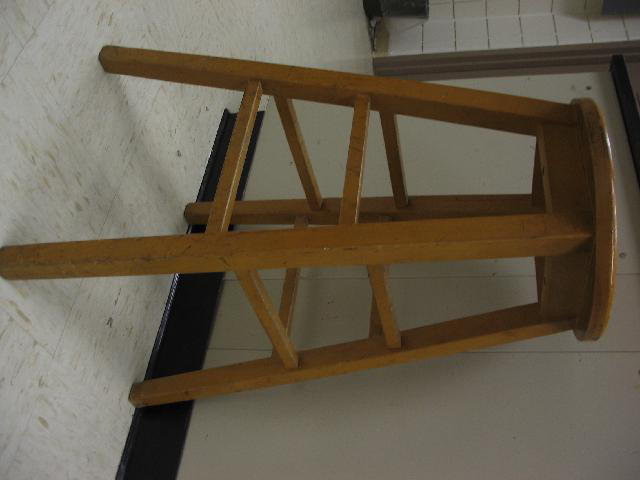

In [56]:
from PIL import Image
Image.open(path_rf_im)

In [39]:
hash_obj = Hashing()
hash_ref_im = hash_obj.dhash(path_rf_im)

In [40]:
hash_ref_im

'2412141495353e20'

In [58]:
hamdists = dict()
hmdist = hash_obj.hamming_distance

"""for i in os.listdir(path_search_dir):
    if i.endswith('.jpg'):
        hdist_i = hash_obj.dhash(Path(os.path.join(path_search_dir, i)))
        hamdists[i] = hmdist(hash_ref_im, hdist_i)"""

"for i in os.listdir(path_search_dir):\n    if i.endswith('.jpg'):\n        hdist_i = hash_obj.dhash(Path(os.path.join(path_search_dir, i)))\n        hamdists[i] = hmdist(hash_ref_im, hdist_i)"

In [57]:
def whore(hmdist):
    for i in os.listdir(path_search_dir):
        if i.endswith('.jpg'):
            hdist_i = hash_obj.dhash(Path(os.path.join(path_search_dir, i)))
            hamdists[i] = hmdist(hash_ref_im, hdist_i)
    return hamdists

In [59]:
blahm = whore(hmdist)

In [48]:
hamdists['ukbench08975_resize.jpg']

2

In [53]:
hamdists['ukbench08975_rotation.jpg']

16

In [60]:
hamdist_distr = list(blahm.values())

# hamdist_distr = list(hamdists.values())

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        2.900e+01, 1.132e+03, 2.757e+03, 8.826e+03]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

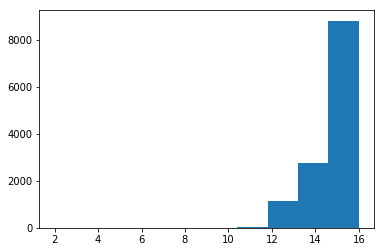

In [61]:
# barplot hamdist distribution
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(hamdist_distr)

In [49]:
import numpy as np

In [62]:
dict(zip(range(len(np.bincount(hamdist_distr))), np.bincount(hamdist_distr)))

{0: 0,
 1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 5,
 11: 29,
 12: 220,
 13: 912,
 14: 2757,
 15: 5223,
 16: 3603}

In [ ]:
# debugging ndcg obtained on the pipleline

In [11]:
import os
import pickle
import numpy as np
from pathlib import Path

In [5]:
with open('/Users/tanuj.jain/Documents/image-dedup/examples/returned_dict.pkl', 'rb') as f:
    returned_dict = pickle.load(f)

In [6]:
returned_dict

{'ukbench08791.jpg': ['ukbench08791_resize.jpg'],
 'ukbench05289.jpg': ['ukbench05289_resize.jpg'],
 'ukbench06780.jpg': ['ukbench06780_resize.jpg'],
 'ukbench08975.jpg': ['ukbench08975_resize.jpg'],
 'ukbench06958.jpg': ['ukbench06958_resize.jpg'],
 'ukbench01951.jpg': ['ukbench01951_resize.jpg'],
 'ukbench01789.jpg': ['ukbench01789_resize.jpg'],
 'ukbench02294.jpg': ['ukbench02294_resize.jpg'],
 'ukbench06794.jpg': ['ukbench06794_resize.jpg'],
 'ukbench05276.jpg': ['ukbench05276_resize.jpg'],
 'ukbench07461.jpg': ['ukbench07461_resize.jpg'],
 'ukbench01762.jpg': ['ukbench01762_resize.jpg',
  'ukbench01762_cropped.jpg',
  'ukbench01762_vflip.jpg'],
 'ukbench07475.jpg': ['ukbench07475_resize.jpg'],
 'ukbench10109.jpg': ['ukbench10109_resize.jpg'],
 'ukbench10121.jpg': ['ukbench10121_resize.jpg'],
 'ukbench09470.jpg': ['ukbench09470_resize.jpg'],
 'ukbench06743.jpg': ['ukbench06743_resize.jpg'],
 'ukbench02525.jpg': ['ukbench02525_resize.jpg'],
 'ukbench02243.jpg': ['ukbench02243_resize

In [9]:
ret_count = [len(i) for i in list(returned_dict.values())]

In [10]:
ret_count

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 13,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,

In [13]:
np.bincount(ret_count)

array([   3, 2446,   67,   14,    4,    2,    4,    1,    2,    1,    0,
          2,    2,    1,    0,    1])

In [14]:
returned_dict

{'ukbench08791.jpg': ['ukbench08791_resize.jpg'],
 'ukbench05289.jpg': ['ukbench05289_resize.jpg'],
 'ukbench06780.jpg': ['ukbench06780_resize.jpg'],
 'ukbench08975.jpg': ['ukbench08975_resize.jpg'],
 'ukbench06958.jpg': ['ukbench06958_resize.jpg'],
 'ukbench01951.jpg': ['ukbench01951_resize.jpg'],
 'ukbench01789.jpg': ['ukbench01789_resize.jpg'],
 'ukbench02294.jpg': ['ukbench02294_resize.jpg'],
 'ukbench06794.jpg': ['ukbench06794_resize.jpg'],
 'ukbench05276.jpg': ['ukbench05276_resize.jpg'],
 'ukbench07461.jpg': ['ukbench07461_resize.jpg'],
 'ukbench01762.jpg': ['ukbench01762_resize.jpg',
  'ukbench01762_cropped.jpg',
  'ukbench01762_vflip.jpg'],
 'ukbench07475.jpg': ['ukbench07475_resize.jpg'],
 'ukbench10109.jpg': ['ukbench10109_resize.jpg'],
 'ukbench10121.jpg': ['ukbench10121_resize.jpg'],
 'ukbench09470.jpg': ['ukbench09470_resize.jpg'],
 'ukbench06743.jpg': ['ukbench06743_resize.jpg'],
 'ukbench02525.jpg': ['ukbench02525_resize.jpg'],
 'ukbench02243.jpg': ['ukbench02243_resize

In [15]:
import sys
sys.path.append('/Users/tanuj.jain/Documents/image-dedup/')

In [16]:
from imagededup.evaluation import EvalPerformance

In [18]:
with open('/Users/tanuj.jain/Documents/dedup-data/Transformed_dataset/ground_truth_transformed.pkl', 'rb') as buf:
    correct_dict = pickle.load(buf)

In [19]:
evaluator = EvalPerformance(correct_dict, returned_dict)

In [20]:
correct_dict

{'ukbench00002.jpg': ['ukbench00002_rotation.jpg',
  'ukbench00002_hflip.jpg',
  'ukbench00002_resize.jpg',
  'ukbench00002_cropped.jpg',
  'ukbench00002_vflip.jpg'],
 'ukbench00005.jpg': ['ukbench00005_rotation.jpg',
  'ukbench00005_hflip.jpg',
  'ukbench00005_resize.jpg',
  'ukbench00005_cropped.jpg',
  'ukbench00005_vflip.jpg'],
 'ukbench00009.jpg': ['ukbench00009_rotation.jpg',
  'ukbench00009_hflip.jpg',
  'ukbench00009_resize.jpg',
  'ukbench00009_cropped.jpg',
  'ukbench00009_vflip.jpg'],
 'ukbench00013.jpg': ['ukbench00013_rotation.jpg',
  'ukbench00013_hflip.jpg',
  'ukbench00013_resize.jpg',
  'ukbench00013_cropped.jpg',
  'ukbench00013_vflip.jpg'],
 'ukbench00017.jpg': ['ukbench00017_rotation.jpg',
  'ukbench00017_hflip.jpg',
  'ukbench00017_resize.jpg',
  'ukbench00017_cropped.jpg',
  'ukbench00017_vflip.jpg'],
 'ukbench00023.jpg': ['ukbench00023_rotation.jpg',
  'ukbench00023_hflip.jpg',
  'ukbench00023_resize.jpg',
  'ukbench00023_cropped.jpg',
  'ukbench00023_vflip.jpg']

In [21]:
correct_dict['ukbench00002.jpg']

['ukbench00002_rotation.jpg',
 'ukbench00002_hflip.jpg',
 'ukbench00002_resize.jpg',
 'ukbench00002_cropped.jpg',
 'ukbench00002_vflip.jpg']

In [22]:
returned_dict['ukbench00002.jpg']

['ukbench00002_resize.jpg']

In [23]:
evaluator.ndcg(correct_dict['ukbench00002.jpg'], returned_dict['ukbench00002.jpg'])

1.0

In [24]:
evaluator.avg_prec(correct_dict['ukbench00002.jpg'], returned_dict['ukbench00002.jpg'])

0.2

In [25]:
evaluator.jaccard_similarity(correct_dict['ukbench00002.jpg'], returned_dict['ukbench00002.jpg'])

0.2